In [5]:
import sklearn.datasets as ds
from sklearn.preprocessing import StandardScaler
import numpy as np
from pathlib import Path
import pandas as pd
import torch
import sklearn.linear_model as lm

In [2]:
# Bật autoreload
%load_ext autoreload
%autoreload 2

In [98]:
from regression_dataset import download_diabetes, split_data_train_val_test
X, y = download_diabetes()
X_train, y_train, X_val, y_val, X_test, y_test = split_data_train_val_test(X, y, 0.6, 0.2)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)
X_test = scale.transform(X_test)
print("Data converted to PyTorch tensors successfully.")

Train: (265, 10) Validation: (88, 10) Test: (89, 10)
Data converted to PyTorch tensors successfully.


In [5]:
# train/ linear regression model
import sklearn.linear_model as lm
model = lm.LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully.")
# predict
y_pred = model.predict(X_val)
print("Prediction successful.")
# evaluate
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

Model trained successfully.
Prediction successful.
Mean Squared Error: 3068.1257365943675


In [6]:
# metric neg_mse
def neg_mse(y_true, y_pred):
    return -metrics.mean_squared_error(y_true, y_pred)
print("Custom metric neg_mse defined successfully.")


Custom metric neg_mse defined successfully.


In [7]:
neg_mse = neg_mse(y_val, y_pred)
print(f"Neg MSE: {neg_mse}")

Neg MSE: -3068.1257365943675


In [11]:
from machine_learning_model import LogisticRegression
from nosify import mix_label
y_copy = y_train.copy()
param = mix_label(y_copy, y_val, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)
# train model logistic regression
input_dim = X_train.shape[1]
model = lm.LinearRegression()
model.fit(X_train, y_labels_noisy)
# predict
y_pred = model.predict(X_val)
# evaluate
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

88
Noisy training labels shape: (265,)
Mean Squared Error: 3799.953442314952


In [17]:
print(np.unique(y_labels_noisy))
print(y_labels_noisy.shape)
print(len(np.unique(y_labels_noisy)))
print("Noisy training labels:", y_labels_noisy)

[ 39.  42.  44.  48.  49.  51.  52.  53.  55.  58.  59.  60.  61.  63.
  64.  65.  66.  68.  69.  70.  71.  72.  74.  75.  77.  78.  79.  83.
  84.  85.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97. 101. 102.
 103. 104. 107. 108. 109. 110. 111. 115. 118. 120. 121. 122. 124. 125.
 127. 128. 129. 131. 132. 134. 135. 136. 137. 138. 139. 140. 141. 142.
 143. 144. 150. 151. 152. 155. 158. 160. 161. 162. 163. 164. 166. 167.
 168. 170. 172. 174. 175. 178. 179. 180. 181. 182. 185. 187. 190. 192.
 195. 197. 200. 202. 206. 208. 212. 214. 216. 217. 219. 220. 232. 233.
 235. 236. 237. 241. 242. 243. 244. 245. 248. 249. 252. 253. 257. 259.
 261. 262. 263. 264. 268. 270. 272. 275. 277. 281. 283. 288. 295. 297.
 302. 303. 311. 321. 332. 341. 346.]
(265,)
147
Noisy training labels: [ 78. 152. 200.  59. 311. 321. 332. 208. 120. 135. 220. 233.  72.  51.
 195. 182. 217.  94.  89. 111.  91. 181. 140.  97. 115. 202.  84.  92.
 253. 144. 262. 115.  68.  65. 252. 212. 142. 164. 180. 163. 151. 283.
  66. 

Running evaluator: KNNEvaluator


100%|██████████| 264/264 [00:00<00:00, 8800.92it/s]

KNNEvaluator completed in 0.04 seconds.
Running evaluator: LavaEvaluator


C1: torch.Size([1, 265, 88])
C2: torch.Size([1, 265, 88])
C1: torch.Size([1, 88, 265])
C2: torch.Size([1, 88, 265])
LavaEvaluator completed in 1.70 seconds.
KNNEvaluator: {'found_rates': [0.0, 0.09433962264150944, 0.1509433962264151, 0.2641509433962264, 0.2830188679245283, 0.3018867924528302, 0.33962264150943394, 0.39622641509433965, 0.4339622641509434, 0.4716981132075472, 0.5660377358490566, 0.5660377358490566, 0.6037735849056604, 0.6415094339622641, 0.6792452830188679, 0.7169811320754716, 0.7735849056603774, 0.8113207547169812, 0.8679245283018868, 0.9056603773584906, 0.9811320754716981, 1.0], 'axis': [0.0, 0.045454545454545456, 0.09090909090909091, 0.13636363636363635, 0.18181818181818182, 0.22727272727272727, 0.2727272727272727, 0.3181818181818182, 0.36363636363636365, 0.4090909090909091, 0.45454545454545453, 0.5, 0.5454545454545454, 0.5909090909090909, 0.6363636363636364, 0.6818181818181818, 0.7272727272727273, 0.7727272727272727, 0.8181818181818182, 0.8636363636363636, 0.909090909

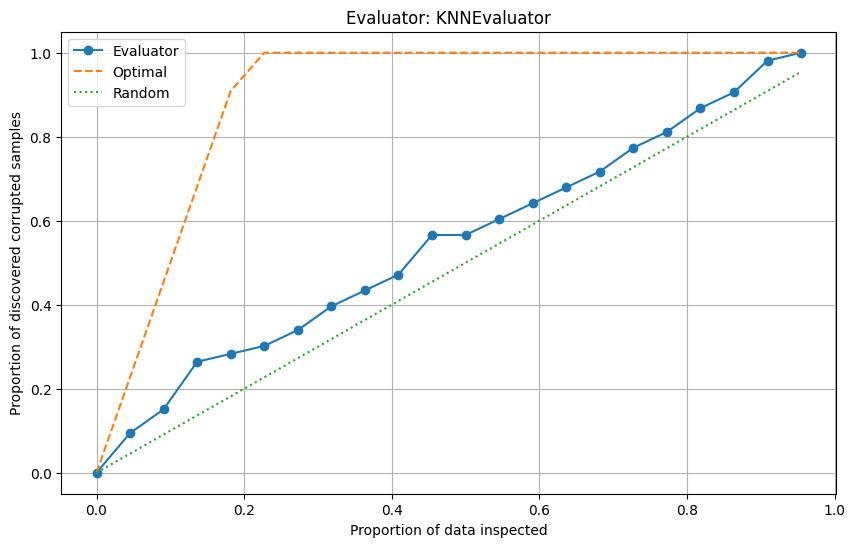

LavaEvaluator: {'found_rates': [0.0, 0.05660377358490566, 0.1509433962264151, 0.16981132075471697, 0.22641509433962265, 0.2641509433962264, 0.3018867924528302, 0.32075471698113206, 0.33962264150943394, 0.39622641509433965, 0.4339622641509434, 0.49056603773584906, 0.6037735849056604, 0.6792452830188679, 0.6981132075471698, 0.7547169811320755, 0.7547169811320755, 0.8113207547169812, 0.8867924528301887, 0.9433962264150944, 1.0, 1.0], 'axis': [0.0, 0.045454545454545456, 0.09090909090909091, 0.13636363636363635, 0.18181818181818182, 0.22727272727272727, 0.2727272727272727, 0.3181818181818182, 0.36363636363636365, 0.4090909090909091, 0.45454545454545453, 0.5, 0.5454545454545454, 0.5909090909090909, 0.6363636363636364, 0.6818181818181818, 0.7272727272727273, 0.7727272727272727, 0.8181818181818182, 0.8636363636363636, 0.9090909090909091, 0.9545454545454546]}


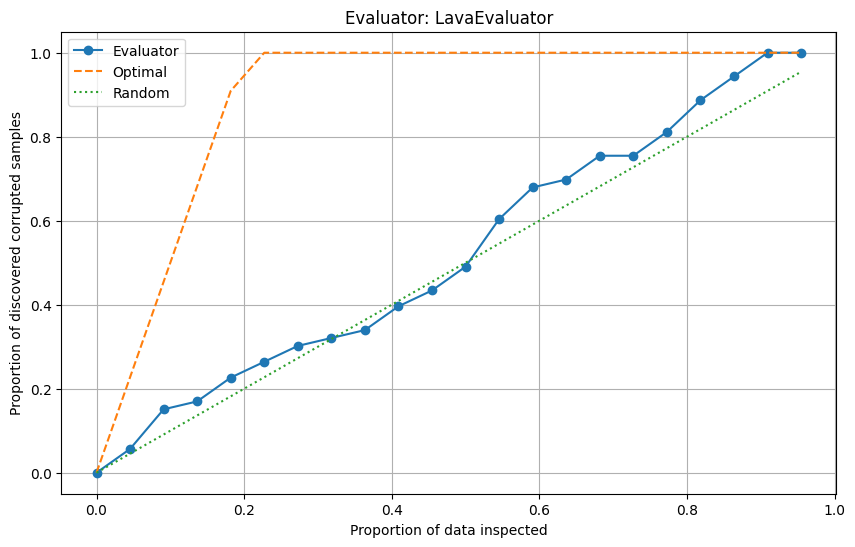

{'KNNEvaluator': {'found_rates': [0.0,
   0.09433962264150944,
   0.1509433962264151,
   0.2641509433962264,
   0.2830188679245283,
   0.3018867924528302,
   0.33962264150943394,
   0.39622641509433965,
   0.4339622641509434,
   0.4716981132075472,
   0.5660377358490566,
   0.5660377358490566,
   0.6037735849056604,
   0.6415094339622641,
   0.6792452830188679,
   0.7169811320754716,
   0.7735849056603774,
   0.8113207547169812,
   0.8679245283018868,
   0.9056603773584906,
   0.9811320754716981,
   1.0],
  'axis': [0.0,
   0.045454545454545456,
   0.09090909090909091,
   0.13636363636363635,
   0.18181818181818182,
   0.22727272727272727,
   0.2727272727272727,
   0.3181818181818182,
   0.36363636363636365,
   0.4090909090909091,
   0.45454545454545453,
   0.5,
   0.5454545454545454,
   0.5909090909090909,
   0.6363636363636364,
   0.6818181818181818,
   0.7272727272727273,
   0.7727272727272727,
   0.8181818181818182,
   0.8636363636363636,
   0.9090909090909091,
   0.954545454545454

In [26]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train, y_labels_noisy, X_val, y_val)
experiment.evaluate(noisy_train_indices)

Running evaluator: KNNEvaluator


Computing Shapley Values: 100%|██████████| 264/264 [00:00<00:00, 10562.07it/s]

KNNEvaluator completed in 0.04 seconds.
Running evaluator: LavaEvaluator


C1 shape: torch.Size([1, 265, 88])
C2 shape: torch.Size([1, 265, 88])
C1: tensor([[[ 6.0924,  4.5972, 15.0185,  ..., 10.7652,  5.5486, 10.1051],
         [17.9068, 10.9639, 13.8946,  ..., 19.7312,  9.2362, 10.6596],
         [16.0378,  6.4892,  9.2873,  ...,  8.7243,  8.6890,  9.9254],
         ...,
         [15.0553, 15.6772,  2.2020,  ...,  5.1801,  9.9002,  7.8904],
         [ 6.4210, 10.5241,  9.4102,  ...,  2.5432,  8.8446, 10.1774],
         [ 6.8653, 12.8343,  8.3269,  ...,  9.9082,  2.0495,  8.6487]]])
C2: tensor([[[ 24.,  50., 124.,  ...,  63.,  70.,  31.],
         [ 50.,  24.,  50.,  ...,  11.,   4., 105.],
         [ 98.,  72.,   2.,  ...,  59.,  52., 153.],
         ...,
         [219., 193., 119.,  ..., 180., 173., 274.],
         [ 40.,  14.,  60.,  ...,   1.,   6.,  95.],
         [  7.,  19.,  93.,  ...,  32.,  39.,  62.]]])
C1: tensor([[[0.0947, 0.0706, 0.2382,  ..., 0.1698, 0.0859, 0.1592],
         [0.2846, 0.1730, 0.2201,  ..., 0.3139, 0.1452, 0.1681],
         [0.

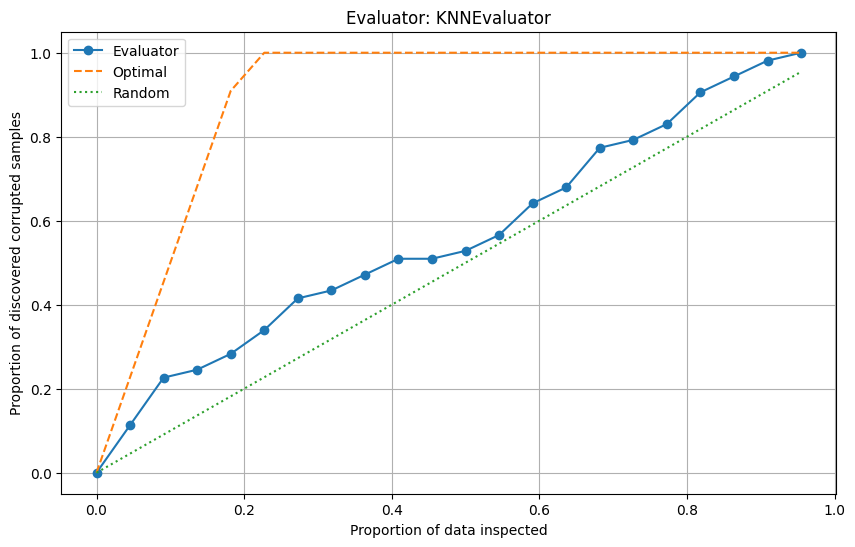

LavaEvaluator: {'found_rates': [0.0, 0.05660377358490566, 0.16981132075471697, 0.18867924528301888, 0.22641509433962265, 0.2641509433962264, 0.3018867924528302, 0.37735849056603776, 0.41509433962264153, 0.4528301886792453, 0.49056603773584906, 0.5660377358490566, 0.6226415094339622, 0.6415094339622641, 0.660377358490566, 0.6981132075471698, 0.7358490566037735, 0.8113207547169812, 0.8490566037735849, 0.9433962264150944, 0.9811320754716981, 1.0], 'axis': [0.0, 0.045454545454545456, 0.09090909090909091, 0.13636363636363635, 0.18181818181818182, 0.22727272727272727, 0.2727272727272727, 0.3181818181818182, 0.36363636363636365, 0.4090909090909091, 0.45454545454545453, 0.5, 0.5454545454545454, 0.5909090909090909, 0.6363636363636364, 0.6818181818181818, 0.7272727272727273, 0.7727272727272727, 0.8181818181818182, 0.8636363636363636, 0.9090909090909091, 0.9545454545454546]}


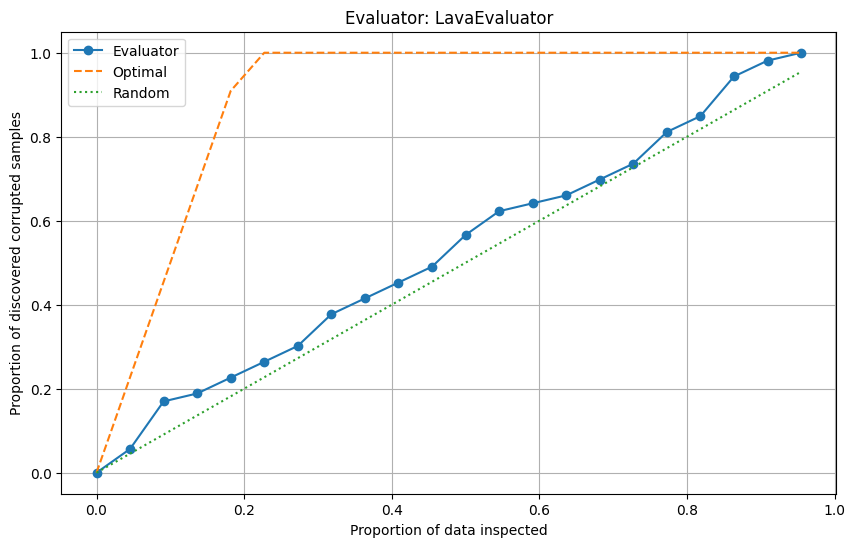

{'KNNEvaluator': {'found_rates': [0.0,
   0.11320754716981132,
   0.22641509433962265,
   0.24528301886792453,
   0.2830188679245283,
   0.33962264150943394,
   0.41509433962264153,
   0.4339622641509434,
   0.4716981132075472,
   0.5094339622641509,
   0.5094339622641509,
   0.5283018867924528,
   0.5660377358490566,
   0.6415094339622641,
   0.6792452830188679,
   0.7735849056603774,
   0.7924528301886793,
   0.8301886792452831,
   0.9056603773584906,
   0.9433962264150944,
   0.9811320754716981,
   1.0],
  'axis': [0.0,
   0.045454545454545456,
   0.09090909090909091,
   0.13636363636363635,
   0.18181818181818182,
   0.22727272727272727,
   0.2727272727272727,
   0.3181818181818182,
   0.36363636363636365,
   0.4090909090909091,
   0.45454545454545453,
   0.5,
   0.5454545454545454,
   0.5909090909090909,
   0.6363636363636364,
   0.6818181818181818,
   0.7272727272727273,
   0.7727272727272727,
   0.8181818181818182,
   0.8636363636363636,
   0.9090909090909091,
   0.9545454545454

In [55]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train, y_labels_noisy, X_val, y_val)
experiment.evaluate(noisy_train_indices)

In [99]:
from machine_learning_model import LogisticRegression
from nosify import mix_label, add_gauss_noise
X_copy = X_train.copy()
param = add_gauss_noise(X_copy, X_val, noise_rate=0.2)
X_train_noisy = param['x_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", X_train_noisy.shape)
# train model logistic regression
input_dim = X_train_noisy.shape[1]
num_classes = len(np.unique(y_train))
# train model logistic regression
input_dim = X_train.shape[1]
model = lm.LinearRegression()
model.fit(X_train_noisy, y_train)
# predict
y_pred = model.predict(X_val)
# evaluate
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

Noisy training labels shape: (265, 10)
Mean Squared Error: 3211.736944362617


Running evaluator: KNNEvaluator


Computing Shapley Values: 100%|██████████| 264/264 [00:00<00:00, 5798.39it/s]

KNNEvaluator completed in 0.07 seconds.
Running evaluator: LavaEvaluator


C1 shape: torch.Size([1, 265, 88])
C2 shape: torch.Size([1, 265, 88])
C1: tensor([[[ 6.0924,  4.5972, 15.0185,  ...,  9.7651,  5.5486, 10.1051],
         [17.9068, 10.9639, 13.8946,  ..., 13.5369,  9.2362, 10.6596],
         [16.0378,  6.4892,  9.2873,  ..., 10.9824,  8.6890,  9.9254],
         ...,
         [15.0553, 15.6772,  2.2020,  ...,  8.2883,  9.9002,  7.8904],
         [ 6.4210, 10.5241,  9.4102,  ...,  7.8599,  8.8446, 10.1774],
         [15.4792, 24.5448, 15.3087,  ..., 14.7489,  8.4700, 18.6962]]])
C2: tensor([[[ 24.,  50., 124.,  ...,   7.,  70.,  31.],
         [ 50.,  24.,  50.,  ...,  67.,   4., 105.],
         [ 98.,  72.,   2.,  ..., 115.,  52., 153.],
         ...,
         [219., 193., 119.,  ..., 236., 173., 274.],
         [ 40.,  14.,  60.,  ...,  57.,   6.,  95.],
         [ 15.,  41., 115.,  ...,   2.,  61.,  40.]]])
C1: tensor([[[0.0944, 0.0704, 0.2375,  ..., 0.1533, 0.0857, 0.1587],
         [0.2837, 0.1725, 0.2194,  ..., 0.2137, 0.1448, 0.1676],
         [0.

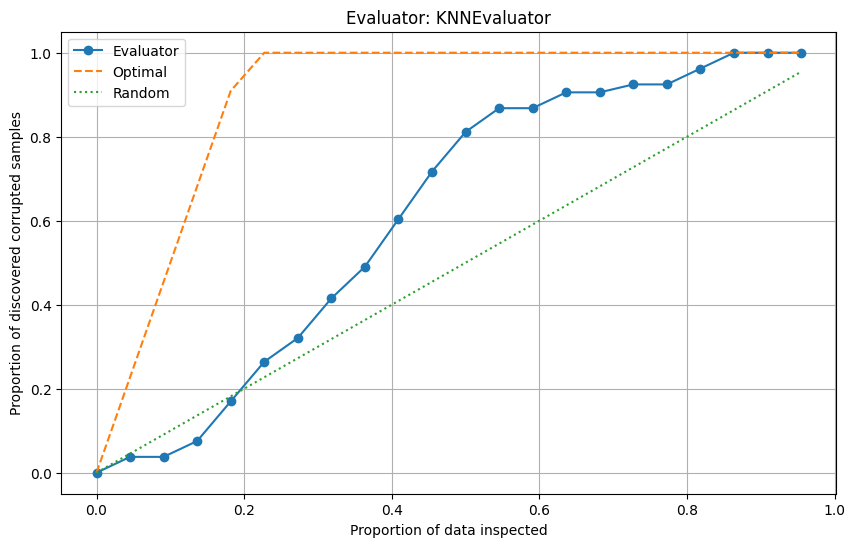

LavaEvaluator: {'found_rates': [0.0, 0.1509433962264151, 0.2830188679245283, 0.4339622641509434, 0.5849056603773585, 0.6037735849056604, 0.6792452830188679, 0.7924528301886793, 0.8301886792452831, 0.8679245283018868, 0.9056603773584906, 0.9056603773584906, 0.9056603773584906, 0.9245283018867925, 0.9245283018867925, 0.9433962264150944, 0.9433962264150944, 0.9811320754716981, 0.9811320754716981, 1.0, 1.0, 1.0], 'axis': [0.0, 0.045454545454545456, 0.09090909090909091, 0.13636363636363635, 0.18181818181818182, 0.22727272727272727, 0.2727272727272727, 0.3181818181818182, 0.36363636363636365, 0.4090909090909091, 0.45454545454545453, 0.5, 0.5454545454545454, 0.5909090909090909, 0.6363636363636364, 0.6818181818181818, 0.7272727272727273, 0.7727272727272727, 0.8181818181818182, 0.8636363636363636, 0.9090909090909091, 0.9545454545454546]}


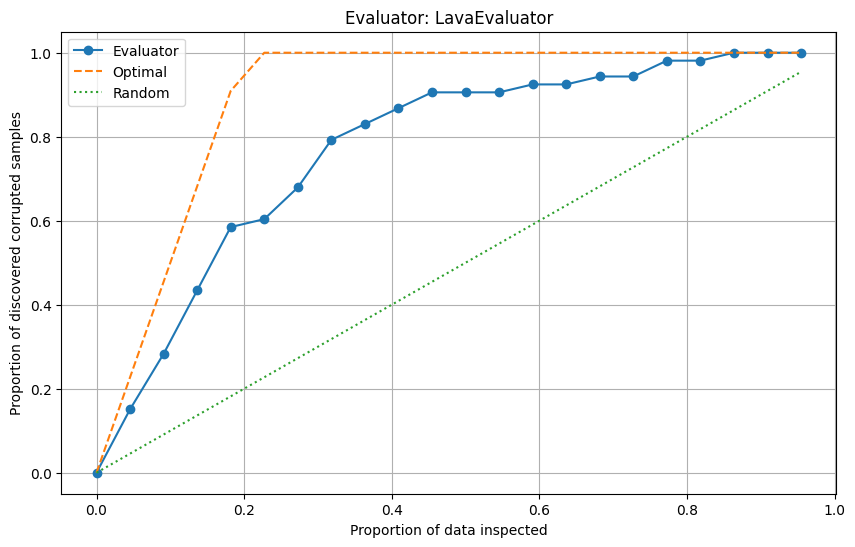

{'KNNEvaluator': {'found_rates': [0.0,
   0.03773584905660377,
   0.03773584905660377,
   0.07547169811320754,
   0.16981132075471697,
   0.2641509433962264,
   0.32075471698113206,
   0.41509433962264153,
   0.49056603773584906,
   0.6037735849056604,
   0.7169811320754716,
   0.8113207547169812,
   0.8679245283018868,
   0.8679245283018868,
   0.9056603773584906,
   0.9056603773584906,
   0.9245283018867925,
   0.9245283018867925,
   0.9622641509433962,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.045454545454545456,
   0.09090909090909091,
   0.13636363636363635,
   0.18181818181818182,
   0.22727272727272727,
   0.2727272727272727,
   0.3181818181818182,
   0.36363636363636365,
   0.4090909090909091,
   0.45454545454545453,
   0.5,
   0.5454545454545454,
   0.5909090909090909,
   0.6363636363636364,
   0.6818181818181818,
   0.7272727272727273,
   0.7727272727272727,
   0.8181818181818182,
   0.8636363636363636,
   0.9090909090909091,
   0.9545454545454546]},
 'LavaEvaluator': {'f

In [100]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train_noisy, y_train, X_val, y_val)  
experiment.evaluate(noisy_train_indices)

In [3]:
from regression_dataset import download_stock, split_data_train_val_test
X, y = download_stock()
X, y = X[:2000], y[:2000]
X_train, y_train, X_val, y_val, X_test, y_test = split_data_train_val_test(X, y, 0.6, 0.2)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)
X_test = scale.transform(X_test)
print("Data converted to PyTorch tensors successfully.")

Train: (1200, 9) Validation: (400, 9) Test: (400, 9)
Data converted to PyTorch tensors successfully.


In [6]:
from machine_learning_model import LogisticRegression
from nosify import mix_label, add_gauss_noise
X_copy = X_train.copy()
param = add_gauss_noise(X_copy, X_val, noise_rate=0.2)
X_train_noisy = param['x_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", X_train_noisy.shape)
# train model logistic regression
input_dim = X_train_noisy.shape[1]
num_classes = len(np.unique(y_train))
# train model logistic regression
input_dim = X_train.shape[1]
model = lm.LinearRegression()
model.fit(X_train_noisy, y_train)
# predict
y_pred = model.predict(X_val)
# evaluate
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

Noisy training labels shape: (1200, 9)
Mean Squared Error: 0.8235800362897737


Running evaluator: KNNEvaluator


Computing Shapley Values: 100%|██████████| 1199/1199 [00:00<00:00, 8231.04it/s]


KNNEvaluator completed in 0.35 seconds.
Running evaluator: LavaEvaluator


C1 la: tensor([[ 4.2099, 12.1055,  7.2275,  ..., 11.6261,  2.2431,  9.8329],
        [ 6.4505,  9.2712,  9.3668,  ...,  8.3695,  7.7575,  8.7455],
        [ 8.8316, 12.1876, 10.9363,  ...,  1.6545, 10.0201,  2.5557],
        ...,
        [ 8.9936, 10.1895,  9.2284,  ...,  2.9913,  9.7028,  2.6486],
        [11.6561,  3.6375,  4.9552,  ..., 20.6164, 11.0604, 19.9284],
        [20.4067, 27.0931, 25.2231,  ...,  8.1401, 26.1422,  8.9787]])
C2 la: tensor([[0.0000, 0.3117, 0.3117,  ..., 0.1939, 0.0000, 0.1939],
        [0.0000, 0.3117, 0.3117,  ..., 0.1939, 0.0000, 0.1939],
        [0.3117, 0.0000, 0.0000,  ..., 0.0000, 0.3117, 0.0000],
        ...,
        [0.3117, 0.0000, 0.0000,  ..., 0.0000, 0.3117, 0.0000],
        [0.3117, 0.0000, 0.0000,  ..., 0.0000, 0.3117, 0.0000],
        [0.1404, 0.1939, 0.1939,  ..., 0.1000, 0.1404, 0.1000]])
C1 la: tensor([[0.0374, 0.1079, 0.0643,  ..., 0.1036, 0.0198, 0.0876],
        [0.0574, 0.0826, 0.0834,  ..., 0.0745, 0.0690, 0.0779],
        [0.0786, 0.

d:\data_values\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


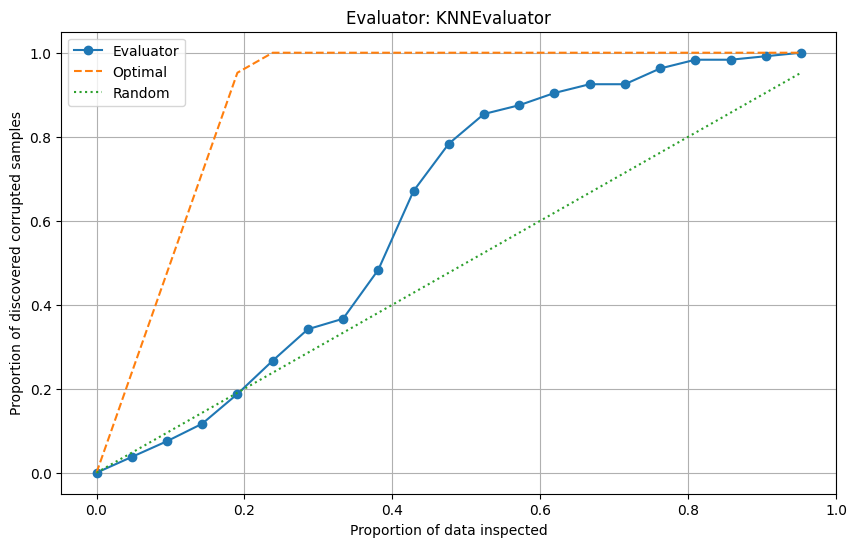

LavaEvaluator: {'found_rates': [0.0, 0.16666666666666666, 0.20833333333333334, 0.225, 0.24166666666666667, 0.32083333333333336, 0.36666666666666664, 0.37916666666666665, 0.48333333333333334, 0.6916666666666667, 0.7791666666666667, 0.8625, 0.8916666666666667, 0.9083333333333333, 0.925, 0.9375, 0.9541666666666667, 0.9708333333333333, 0.9833333333333333, 0.9916666666666667, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


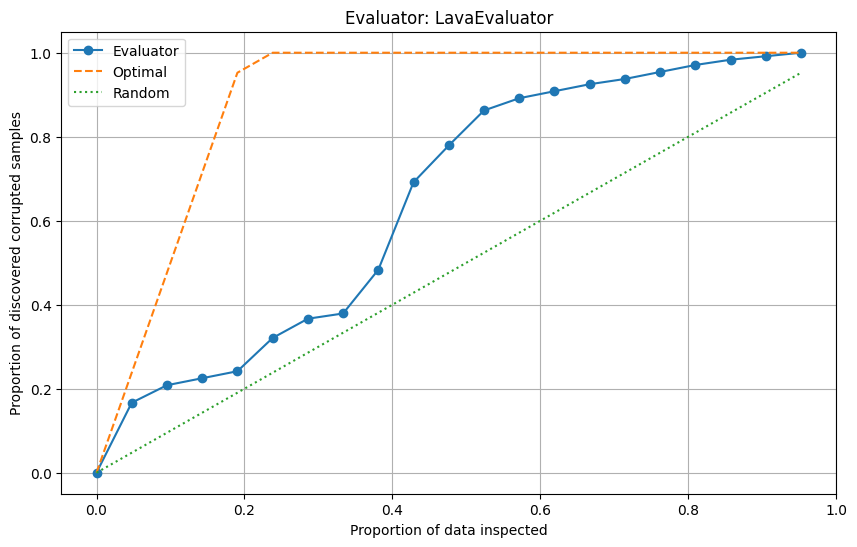

{'KNNEvaluator': {'found_rates': [0.0,
   0.0375,
   0.075,
   0.11666666666666667,
   0.1875,
   0.26666666666666666,
   0.3416666666666667,
   0.36666666666666664,
   0.48333333333333334,
   0.6708333333333333,
   0.7833333333333333,
   0.8541666666666666,
   0.875,
   0.9041666666666667,
   0.925,
   0.925,
   0.9625,
   0.9833333333333333,
   0.9833333333333333,
   0.9916666666666667,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.16666666666666666,
   0.20833333333333334,
   0.225,
   0.241666666

In [8]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train_noisy, y_train, X_val, y_val)  
experiment.evaluate(noisy_train_indices)

In [60]:
from machine_learning_model import LogisticRegression
from nosify import mix_label
y_copy = y_train.copy()
param = mix_label(y_copy, y_val, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)
# train model logistic regression
input_dim = X_train.shape[1]
model = lm.LinearRegression()
model.fit(X_train, y_labels_noisy)
# predict
y_pred = model.predict(X_val)
# evaluate
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

11810
Noisy training labels shape: (35429,)
Mean Squared Error: 0.6500427190658535


Running evaluator: KNNEvaluator


Computing Shapley Values: 100%|██████████| 35428/35428 [02:28<00:00, 238.02it/s]


KNNEvaluator completed in 622.93 seconds.
Running evaluator: LavaEvaluator
C1 shape: torch.Size([1, 35429, 11810])
C2 shape: torch.Size([1, 35429, 11810])
C1: tensor([[[11.3968,  7.9313,  5.7690,  ...,  1.9631,  7.0226, 10.7329],
         [14.1009, 11.3844, 10.6314,  ..., 10.8107,  8.3588,  3.9637],
         [17.2825,  9.0862, 11.1568,  ...,  8.7515,  6.3743,  6.4774],
         ...,
         [12.7772,  8.6753, 10.9842,  ...,  2.8184,  7.8298, 11.6416],
         [15.9910, 19.5055, 20.1983,  ..., 16.1370, 15.7061, 11.6960],
         [13.7108,  8.7197,  9.4514,  ..., 10.0621,  5.6577,  3.5878]]])
C2: tensor([[[1.0836, 0.8215, 0.0304,  ..., 0.3529, 2.9976, 2.9606],
         [0.0708, 0.1913, 1.0432,  ..., 0.6599, 1.9848, 1.9478],
         [1.8084, 2.0705, 2.9223,  ..., 2.5390, 0.1057, 0.0687],
         ...,
         [2.0828, 2.3449, 3.1967,  ..., 2.8134, 0.1687, 0.2057],
         [0.5793, 0.8414, 1.6933,  ..., 1.3100, 1.3347, 1.2978],
         [0.2819, 0.5440, 1.3958,  ..., 1.0125, 1.6322, 

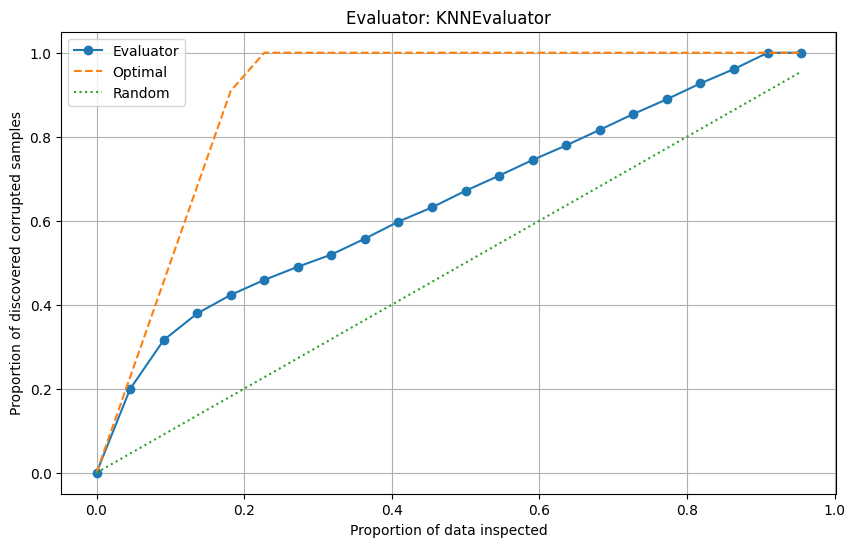

LavaEvaluator: {'found_rates': [0.0, 0.10966831333803811, 0.1943542695836274, 0.26591390261115033, 0.3312632321806634, 0.3895553987297107, 0.4455892731122089, 0.49498941425546933, 0.5402964008468596, 0.5856033874382498, 0.6331686661961892, 0.673817925194072, 0.713620324629499, 0.7534227240649259, 0.7928016937191249, 0.8280875088214538, 0.8694424841213833, 0.899788285109386, 0.9335215243472125, 0.9647141848976711, 0.9997177134791814, 1.0], 'axis': [0.0, 0.045454545454545456, 0.09090909090909091, 0.13636363636363635, 0.18181818181818182, 0.22727272727272727, 0.2727272727272727, 0.3181818181818182, 0.36363636363636365, 0.4090909090909091, 0.45454545454545453, 0.5, 0.5454545454545454, 0.5909090909090909, 0.6363636363636364, 0.6818181818181818, 0.7272727272727273, 0.7727272727272727, 0.8181818181818182, 0.8636363636363636, 0.9090909090909091, 0.9545454545454546]}


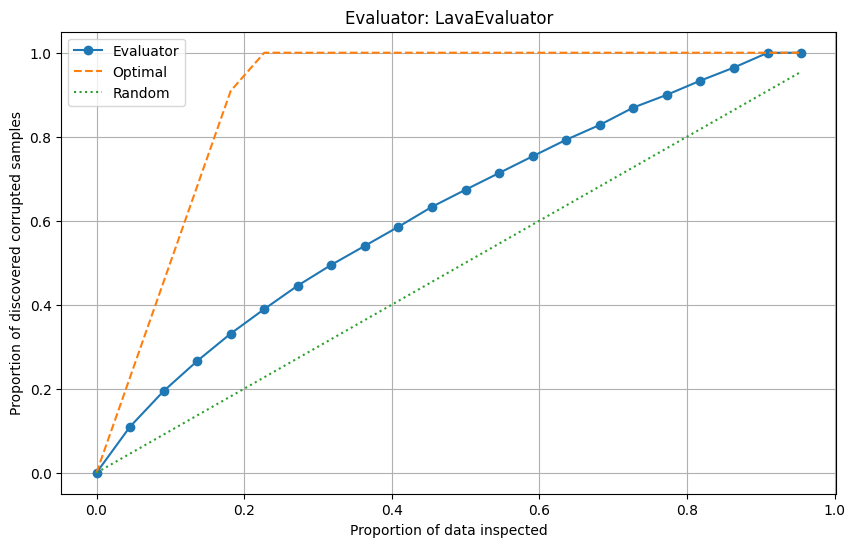

{'KNNEvaluator': {'found_rates': [0.0,
   0.19915314043754412,
   0.3155963302752294,
   0.37911079745942133,
   0.4232886379675371,
   0.4589978828510939,
   0.4903316866619619,
   0.5194071983062809,
   0.5572335920959774,
   0.5978828510938603,
   0.631757233592096,
   0.6712773465067043,
   0.7072688779110797,
   0.7446718419195484,
   0.77939308398024,
   0.8163726182074806,
   0.8540578687367678,
   0.8892025405786874,
   0.9268877911079746,
   0.9610444601270289,
   0.9997177134791814,
   1.0],
  'axis': [0.0,
   0.045454545454545456,
   0.09090909090909091,
   0.13636363636363635,
   0.18181818181818182,
   0.22727272727272727,
   0.2727272727272727,
   0.3181818181818182,
   0.36363636363636365,
   0.4090909090909091,
   0.45454545454545453,
   0.5,
   0.5454545454545454,
   0.5909090909090909,
   0.6363636363636364,
   0.6818181818181818,
   0.7272727272727273,
   0.7727272727272727,
   0.8181818181818182,
   0.8636363636363636,
   0.9090909090909091,
   0.9545454545454546]},

In [61]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train, y_labels_noisy, X_val, y_val)  
experiment.evaluate(noisy_train_indices)

In [ ]:
from machine_learning_model import LogisticRegression
from nosify import mix_label, add_gauss_noise
X_copy = X_train.copy()
param = add_gauss_noise(X_copy, X_val, noise_rate=0.2)
X_train_noisy = param['x_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", X_train_noisy.shape)
# train model logistic regression
input_dim = X_train_noisy.shape[1]
num_classes = len(np.unique(y_train))
# train model logistic regression
input_dim = X_train.shape[1]
model = lm.LinearRegression()
model.fit(X_train_noisy, y_train)
# predict
y_pred = model.predict(X_val)
# evaluate
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train_noisy, y_train, X_val, y_val)  
experiment.evaluate(noisy_train_indices)

In [63]:
from regression_dataset import download_echoMonths, split_data_train_val_test
X, y = download_echoMonths()
X, y = X[:2000], y[:2000]
X_train, y_train, X_val, y_val, X_test, y_test = split_data_train_val_test(X, y, 0.6, 0.2)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)
X_test = scale.transform(X_test)
print("Data converted to PyTorch tensors successfully.")

Train: (1200, 6) Validation: (400, 6) Test: (400, 6)
Data converted to PyTorch tensors successfully.


In [64]:
# save
import pickle

with open('x_y_embedding_echomonths.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_val, y_val, X_test, y_test), f)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(1200, 6) (400, 6) (400, 6)
(1200,) (400,) (400,)


In [101]:
### Load x_y_embedding_data
import pickle
with open('x_y_embedding_echomonths.pkl', 'rb') as f:
    X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(f)

In [66]:
from machine_learning_model import LogisticRegression
from nosify import mix_label
y_copy = y_train.copy()
param = mix_label(y_copy, y_val, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)
# train model logistic regression
input_dim = X_train.shape[1]
model = lm.LinearRegression()
model.fit(X_train, y_labels_noisy)
# predict
y_pred = model.predict(X_val)
# evaluate
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

400
Noisy training labels shape: (1200,)
Mean Squared Error: 0.8310963056930063


Running evaluator: KNNEvaluator


Computing Shapley Values: 100%|██████████| 1199/1199 [00:00<00:00, 5701.39it/s]


KNNEvaluator completed in 0.56 seconds.
Running evaluator: LavaEvaluator
C1 shape: torch.Size([1, 1200, 400])
C2 shape: torch.Size([1, 1200, 400])
C1: tensor([[[ 5.2622,  2.8317,  8.2938,  ...,  1.7586,  6.5816,  8.0726],
         [10.1385,  4.9700, 16.4784,  ...,  6.2572, 10.0061, 10.0877],
         [ 4.9295,  4.6505,  7.0551,  ...,  2.1767, 12.1105,  6.2417],
         ...,
         [ 9.2900,  7.6218, 10.0967,  ...,  5.6750, 12.0841, 11.7282],
         [ 7.2054,  5.0074,  9.7142,  ...,  1.3592,  9.2502,  6.2199],
         [10.2394, 14.9044, 10.2211,  ...,  6.6025,  9.3421, 10.5977]]])
C2: tensor([[[3.3386, 1.3800, 1.4349,  ..., 1.8295, 1.6716, 2.7952],
         [1.0165, 0.9421, 0.8872,  ..., 0.4926, 0.6504, 0.4732],
         [0.6494, 1.3093, 1.2544,  ..., 0.8598, 1.0176, 0.1060],
         ...,
         [2.7359, 0.7773, 0.8322,  ..., 1.2268, 1.0690, 2.1926],
         [2.2855, 0.3269, 0.3818,  ..., 0.7764, 0.6186, 1.7422],
         [1.4115, 0.5471, 0.4922,  ..., 0.0976, 0.2555, 0.8681]]

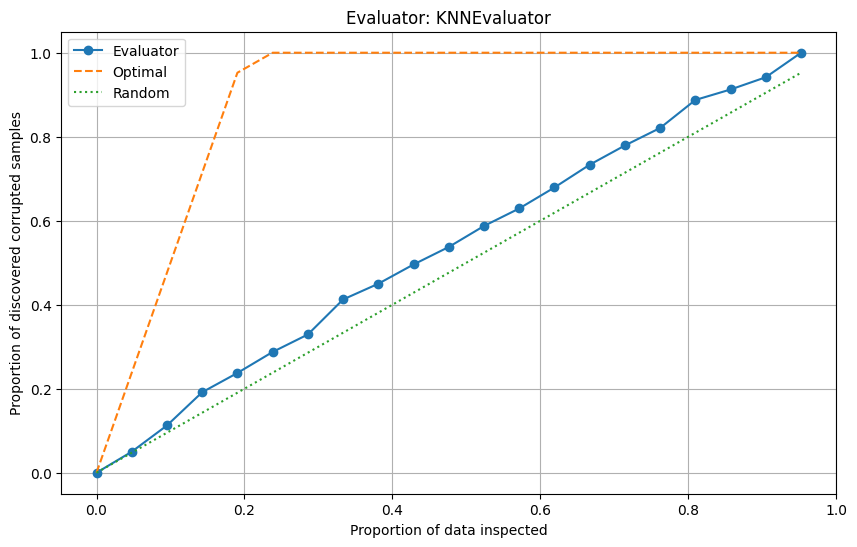

LavaEvaluator: {'found_rates': [0.0, 0.05416666666666667, 0.09166666666666666, 0.17083333333333334, 0.21666666666666667, 0.26666666666666666, 0.3125, 0.35, 0.4166666666666667, 0.4708333333333333, 0.5375, 0.575, 0.6041666666666666, 0.6625, 0.7041666666666667, 0.7541666666666667, 0.8083333333333333, 0.8666666666666667, 0.9041666666666667, 0.9458333333333333, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


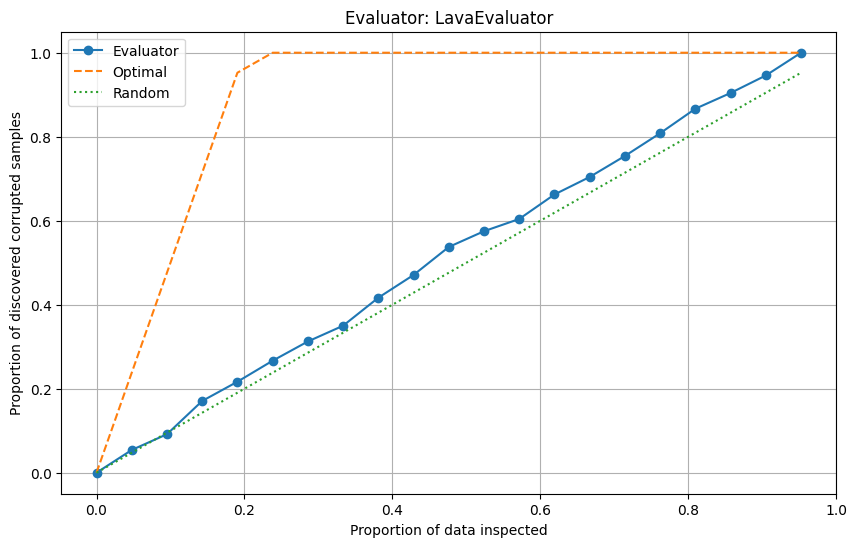

{'KNNEvaluator': {'found_rates': [0.0,
   0.05,
   0.1125,
   0.19166666666666668,
   0.2375,
   0.2875,
   0.32916666666666666,
   0.4125,
   0.45,
   0.49583333333333335,
   0.5375,
   0.5875,
   0.6291666666666667,
   0.6791666666666667,
   0.7333333333333333,
   0.7791666666666667,
   0.8208333333333333,
   0.8875,
   0.9125,
   0.9416666666666667,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.05416666666666667,
   0.09166666666666666,
   0.17083333333333334,
   0.21666666666666667,
   0.26666666

In [67]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train, y_labels_noisy, X_val, y_val)  
experiment.evaluate(noisy_train_indices)

In [102]:
from machine_learning_model import LogisticRegression
from nosify import mix_label, add_gauss_noise
X_copy = X_train.copy()
param = add_gauss_noise(X_copy, X_val, noise_rate=0.2)
X_train_noisy = param['x_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", X_train_noisy.shape)
# train model logistic regression
input_dim = X_train_noisy.shape[1]
num_classes = len(np.unique(y_train))
# train model logistic regression
input_dim = X_train.shape[1]
model = lm.LinearRegression()
model.fit(X_train_noisy, y_train)
# predict
y_pred = model.predict(X_val)
# evaluate
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

Noisy training labels shape: (1200, 6)
Mean Squared Error: 0.828074639442396


Running evaluator: KNNEvaluator


Computing Shapley Values: 100%|██████████| 1199/1199 [00:00<00:00, 5286.79it/s]


KNNEvaluator completed in 0.44 seconds.
Running evaluator: LavaEvaluator
C1 shape: torch.Size([1, 1200, 400])
C2 shape: torch.Size([1, 1200, 400])
C1: tensor([[[ 5.2622,  2.8317,  8.2938,  ...,  1.7586,  6.5816,  8.0726],
         [ 9.8171, 13.2577, 18.3595,  ...,  9.5855, 24.8841,  6.1650],
         [ 4.9295,  4.6505,  7.0551,  ...,  2.1767, 12.1105,  6.2417],
         ...,
         [ 9.2900,  7.6218, 10.0967,  ...,  5.6750, 12.0841, 11.7282],
         [ 7.2054,  5.0074,  9.7142,  ...,  1.3592,  9.2502,  6.2199],
         [12.1944, 14.5673, 17.9905,  ...,  5.4554, 14.6427,  2.7592]]])
C2: tensor([[[3.3386, 1.3800, 1.4349,  ..., 1.8295, 1.6716, 2.7952],
         [2.0310, 0.0724, 0.1273,  ..., 0.5219, 0.3640, 1.4876],
         [0.6494, 1.3093, 1.2544,  ..., 0.8598, 1.0176, 0.1060],
         ...,
         [2.7359, 0.7773, 0.8322,  ..., 1.2268, 1.0690, 2.1926],
         [2.2855, 0.3269, 0.3818,  ..., 0.7764, 0.6186, 1.7422],
         [2.9745, 1.0159, 1.0708,  ..., 1.4654, 1.3075, 2.4311]]

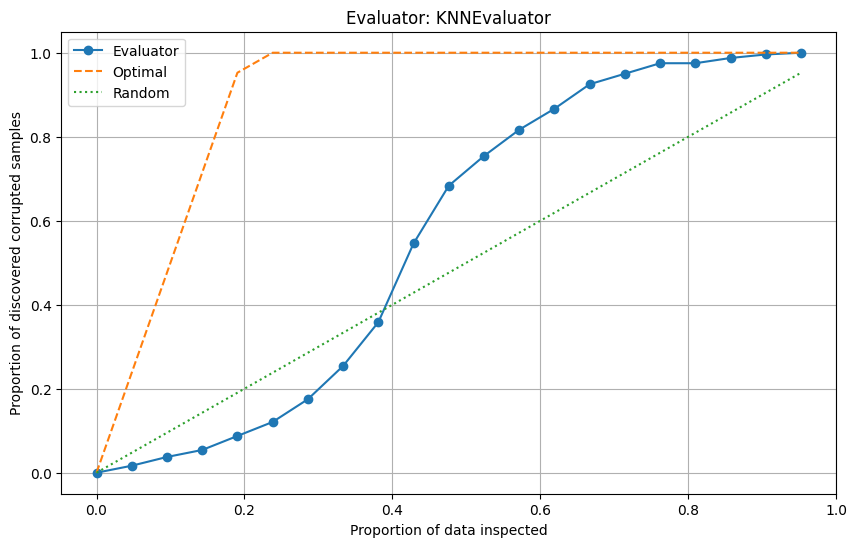

LavaEvaluator: {'found_rates': [0.0, 0.17083333333333334, 0.26666666666666666, 0.3458333333333333, 0.42916666666666664, 0.5041666666666667, 0.5666666666666667, 0.6041666666666666, 0.65, 0.7083333333333334, 0.7708333333333334, 0.8041666666666667, 0.8333333333333334, 0.85, 0.875, 0.9125, 0.9416666666666667, 0.9708333333333333, 0.9833333333333333, 0.9958333333333333, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


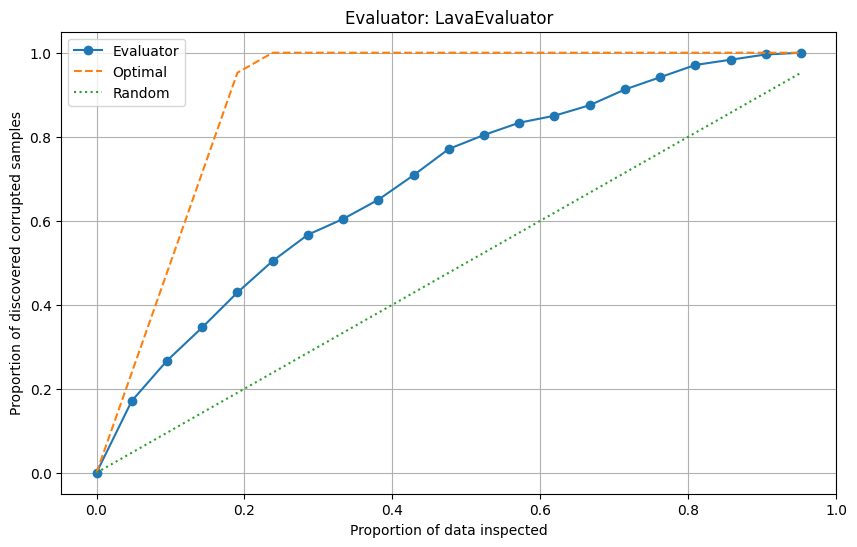

{'KNNEvaluator': {'found_rates': [0.0,
   0.016666666666666666,
   0.0375,
   0.05416666666666667,
   0.0875,
   0.12083333333333333,
   0.175,
   0.25416666666666665,
   0.35833333333333334,
   0.5458333333333333,
   0.6833333333333333,
   0.7541666666666667,
   0.8166666666666667,
   0.8666666666666667,
   0.925,
   0.95,
   0.975,
   0.975,
   0.9875,
   0.9958333333333333,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.17083333333333334,
   0.26666666666666666,
   0.3458333333333333,
   0.42916666

In [103]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train_noisy, y_train, X_val, y_val)  
experiment.evaluate(noisy_train_indices)

In [69]:
from regression_dataset import download_linnerud, download_creditcard
X, y = download_creditcard()
X, y = X[:2000], y[:2000]
X_train, y_train, X_val, y_val, X_test, y_test = split_data_train_val_test(X, y, 0.6, 0.2)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)
X_test = scale.transform(X_test)
print("Data converted to PyTorch tensors successfully.")

Train: (1200, 23) Validation: (400, 23) Test: (400, 23)
Data converted to PyTorch tensors successfully.


In [70]:
# save
import pickle

with open('x_y_embedding_creditcard.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_val, y_val, X_test, y_test), f)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(1200, 23) (400, 23) (400, 23)
(1200,) (400,) (400,)


In [104]:
### Load x_y_embedding_data
import pickle
with open('x_y_embedding_creditcard.pkl', 'rb') as f:
    X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(f)

In [72]:
from machine_learning_model import LogisticRegression
from nosify import mix_label
y_copy = y_train.copy()
param = mix_label(y_copy, y_val, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)
# train model logistic regression
input_dim = X_train.shape[1]
model = lm.LinearRegression()
model.fit(X_train, y_labels_noisy)
# predict
y_pred = model.predict(X_val)
# evaluate
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

400
Noisy training labels shape: (1200,)
Mean Squared Error: 0.22537501933324092


Running evaluator: KNNEvaluator


Computing Shapley Values: 100%|██████████| 1199/1199 [00:00<00:00, 5903.59it/s]


KNNEvaluator completed in 0.34 seconds.
Running evaluator: LavaEvaluator
C1 shape: torch.Size([1, 1200, 400])
C2 shape: torch.Size([1, 1200, 400])
C1: tensor([[[22.3645, 19.0610, 13.2616,  ...,  8.1463,  3.8153, 14.6465],
         [ 7.0451, 25.5150,  5.7251,  ..., 10.8545, 16.6488, 19.7808],
         [43.1090, 41.7876, 35.4561,  ..., 34.6220, 36.7661, 47.2226],
         ...,
         [15.8769, 13.7736,  7.1872,  ...,  9.2369, 11.3769, 14.1655],
         [10.8146, 14.6784,  3.3058,  ...,  7.8596,  8.5694, 10.3834],
         [13.3807, 17.6804,  7.2519,  ...,  9.7789, 13.2664, 16.6190]]])
C2: tensor([[[0., 1., 0.,  ..., 1., 0., 0.],
         [1., 0., 1.,  ..., 0., 1., 1.],
         [0., 1., 0.,  ..., 1., 0., 0.],
         ...,
         [0., 1., 0.,  ..., 1., 0., 0.],
         [0., 1., 0.,  ..., 1., 0., 0.],
         [1., 0., 1.,  ..., 0., 1., 1.]]])
C1: tensor([[[0.0227, 0.0193, 0.0134,  ..., 0.0083, 0.0039, 0.0148],
         [0.0071, 0.0259, 0.0058,  ..., 0.0110, 0.0169, 0.0201],
       

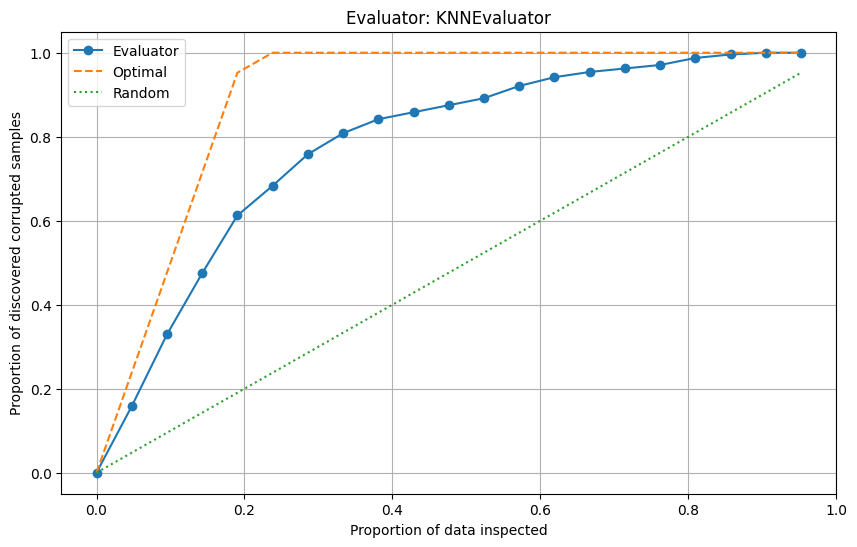

LavaEvaluator: {'found_rates': [0.0, 0.09166666666666666, 0.17083333333333334, 0.25833333333333336, 0.36666666666666664, 0.5166666666666667, 0.6541666666666667, 0.7916666666666666, 0.825, 0.8541666666666666, 0.8666666666666667, 0.875, 0.8916666666666667, 0.9166666666666666, 0.9333333333333333, 0.95, 0.9541666666666667, 0.975, 0.9833333333333333, 0.9916666666666667, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


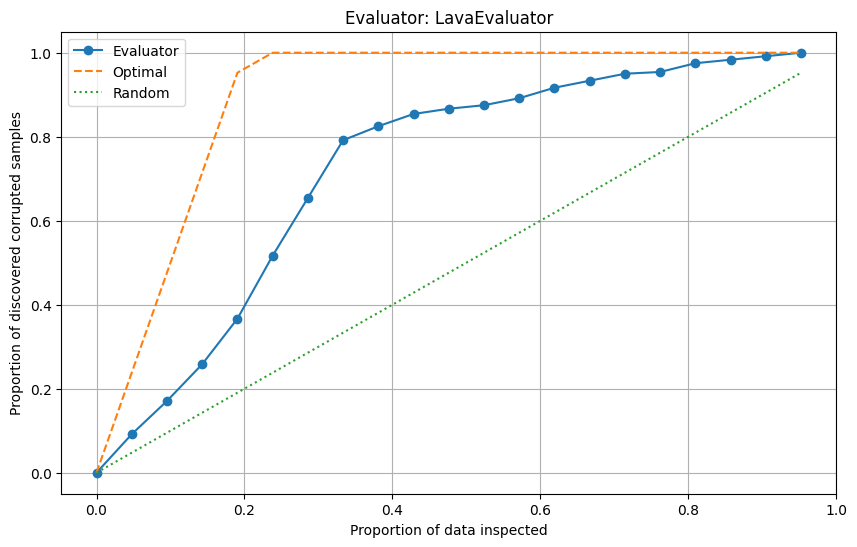

{'KNNEvaluator': {'found_rates': [0.0,
   0.15833333333333333,
   0.32916666666666666,
   0.475,
   0.6125,
   0.6833333333333333,
   0.7583333333333333,
   0.8083333333333333,
   0.8416666666666667,
   0.8583333333333333,
   0.875,
   0.8916666666666667,
   0.9208333333333333,
   0.9416666666666667,
   0.9541666666666667,
   0.9625,
   0.9708333333333333,
   0.9875,
   0.9958333333333333,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.09166666666666666,
   0.17083333333333334,
   0.2583333333

In [73]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train, y_labels_noisy, X_val, y_val)  
experiment.evaluate(noisy_train_indices)

In [105]:
from machine_learning_model import LogisticRegression
from nosify import mix_label, add_gauss_noise
X_copy = X_train.copy()
param = add_gauss_noise(X_copy, X_val, noise_rate=0.2)
X_train_noisy = param['x_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", X_train_noisy.shape)
# train model logistic regression
input_dim = X_train_noisy.shape[1]
num_classes = len(np.unique(y_train))
# train model logistic regression
input_dim = X_train.shape[1]
model = lm.LinearRegression()
model.fit(X_train_noisy, y_train)
# predict
y_pred = model.predict(X_val)
# evaluate
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

Noisy training labels shape: (1200, 23)
Mean Squared Error: 0.16112529573124537


Running evaluator: KNNEvaluator


Computing Shapley Values: 100%|██████████| 1199/1199 [00:00<00:00, 7147.40it/s]


KNNEvaluator completed in 0.31 seconds.
Running evaluator: LavaEvaluator
C1 shape: torch.Size([1, 1200, 400])
C2 shape: torch.Size([1, 1200, 400])
C1: tensor([[[22.3645, 19.0610, 13.2616,  ...,  8.1463,  3.8153, 14.6465],
         [13.6032, 25.2343,  9.4160,  ..., 14.4436, 17.9342, 21.5242],
         [43.1090, 41.7876, 35.4561,  ..., 34.6220, 36.7661, 47.2226],
         ...,
         [15.8769, 13.7736,  7.1872,  ...,  9.2369, 11.3769, 14.1655],
         [10.8146, 14.6784,  3.3058,  ...,  7.8596,  8.5694, 10.3834],
         [34.1278, 20.1263, 19.1725,  ..., 22.3100, 24.0517, 18.2730]]])
C2: tensor([[[0., 1., 0.,  ..., 1., 0., 0.],
         [0., 1., 0.,  ..., 1., 0., 0.],
         [0., 1., 0.,  ..., 1., 0., 0.],
         ...,
         [0., 1., 0.,  ..., 1., 0., 0.],
         [0., 1., 0.,  ..., 1., 0., 0.],
         [0., 1., 0.,  ..., 1., 0., 0.]]])
C1: tensor([[[0.0227, 0.0193, 0.0134,  ..., 0.0083, 0.0039, 0.0148],
         [0.0138, 0.0256, 0.0095,  ..., 0.0146, 0.0182, 0.0218],
       

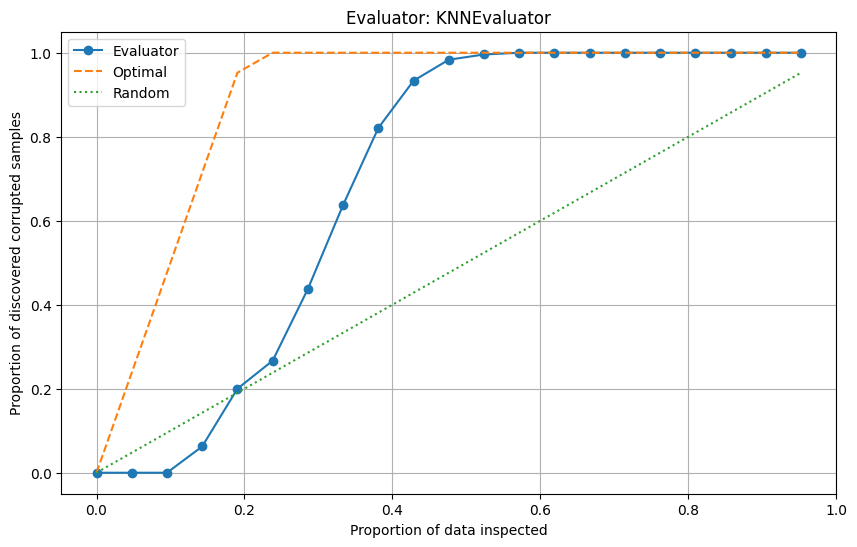

LavaEvaluator: {'found_rates': [0.0, 0.1375, 0.20416666666666666, 0.20833333333333334, 0.20833333333333334, 0.2625, 0.43333333333333335, 0.6083333333333333, 0.7583333333333333, 0.8791666666666667, 0.95, 0.9666666666666667, 0.9916666666666667, 0.9916666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


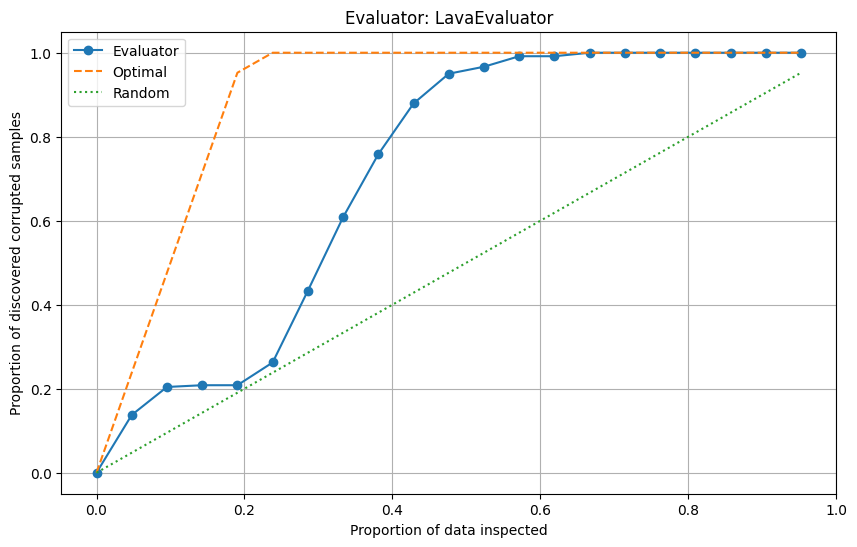

{'KNNEvaluator': {'found_rates': [0.0,
   0.0,
   0.0,
   0.0625,
   0.2,
   0.26666666666666666,
   0.4375,
   0.6375,
   0.8208333333333333,
   0.9333333333333333,
   0.9833333333333333,
   0.9958333333333333,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.1375,
   0.20416666666666666,
   0.20833333333333334,
   0.20833333333333334,
   0.2625,
   0.43333333333333335,
   0.6083333333333333,
   0.7583333333333333,
   0.8791666666666667,
 

In [106]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train_noisy, y_train, X_val, y_val)  
experiment.evaluate(noisy_train_indices)

In [84]:
from regression_dataset import download_mv
X, y = download_mv()
X, y = X[:2000], y[:2000]
X_train, y_train, X_val, y_val, X_test, y_test = split_data_train_val_test(X, y, 0.6, 0.2)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)
X_test = scale.transform(X_test)
print("Data converted to PyTorch tensors successfully.")

Train: (1200, 7) Validation: (400, 7) Test: (400, 7)
Data converted to PyTorch tensors successfully.


In [85]:
# save
import pickle

with open('x_y_embedding_mv.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_val, y_val, X_test, y_test), f)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(1200, 7) (400, 7) (400, 7)
(1200,) (400,) (400,)


In [107]:
### Load x_y_embedding_data
import pickle
with open('x_y_embedding_mv.pkl', 'rb') as f:
    X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(f)

In [87]:
from machine_learning_model import LogisticRegression
from nosify import mix_label
y_copy = y_train.copy()
param = mix_label(y_copy, y_val, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)
# train model logistic regression
input_dim = X_train.shape[1]
model = lm.LinearRegression()
model.fit(X_train, y_labels_noisy)
# predict
y_pred = model.predict(X_val)
# evaluate
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

400
Noisy training labels shape: (1200,)
Mean Squared Error: 0.5334219233480385


Running evaluator: KNNEvaluator


Computing Shapley Values: 100%|██████████| 1199/1199 [00:00<00:00, 4664.49it/s]


KNNEvaluator completed in 0.44 seconds.
Running evaluator: LavaEvaluator
C1 shape: torch.Size([1, 1200, 400])
C2 shape: torch.Size([1, 1200, 400])
C1: tensor([[[ 7.2259, 12.0239,  5.2460,  ..., 11.2108,  3.6809,  7.7096],
         [14.8266,  8.4780, 10.2493,  ...,  4.9774,  4.7819, 18.6926],
         [12.4614,  8.7108,  6.9188,  ...,  8.1584,  5.3628, 10.2108],
         ...,
         [14.3234,  8.7176,  4.8411,  ...,  9.2680,  9.7236, 13.9619],
         [12.1254,  3.7224,  1.8126,  ...,  6.9424,  6.3407, 15.5535],
         [11.6043,  5.0178,  7.7594,  ...,  2.4512,  5.0938, 13.9155]]])
C2: tensor([[[0.0697, 1.3497, 0.5011,  ..., 3.3560, 0.8541, 0.0383],
         [1.4423, 0.0229, 0.8715,  ..., 1.9834, 0.5185, 1.4109],
         [0.4144, 1.0050, 0.1563,  ..., 3.0112, 0.5093, 0.3830],
         ...,
         [0.3137, 1.1057, 0.2571,  ..., 3.1120, 0.6101, 0.2823],
         [2.1085, 0.6891, 1.5377,  ..., 1.3172, 1.1847, 2.0770],
         [0.1767, 1.2427, 0.3940,  ..., 3.2489, 0.7470, 0.1453]]

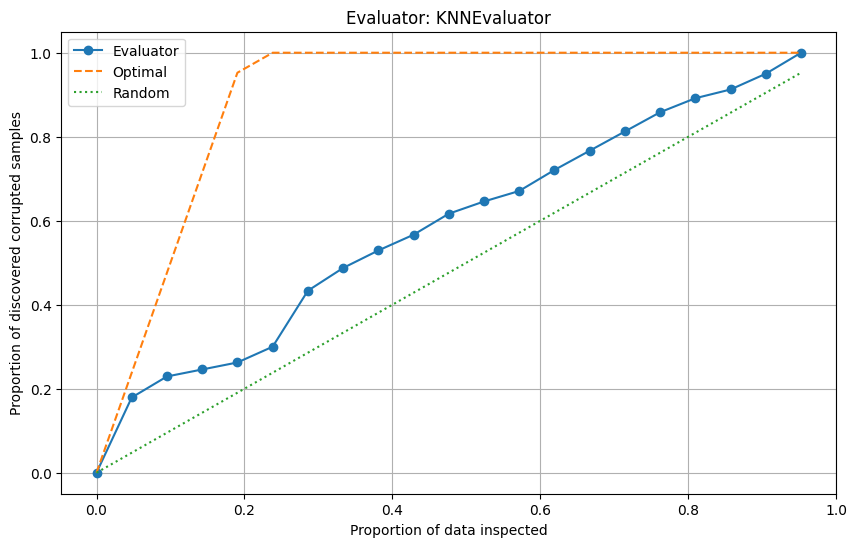

LavaEvaluator: {'found_rates': [0.0, 0.12083333333333333, 0.19583333333333333, 0.25833333333333336, 0.3125, 0.37083333333333335, 0.44166666666666665, 0.5208333333333334, 0.5708333333333333, 0.6041666666666666, 0.6458333333333334, 0.6833333333333333, 0.725, 0.7583333333333333, 0.7958333333333333, 0.8291666666666667, 0.8666666666666667, 0.8958333333333334, 0.9333333333333333, 0.975, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


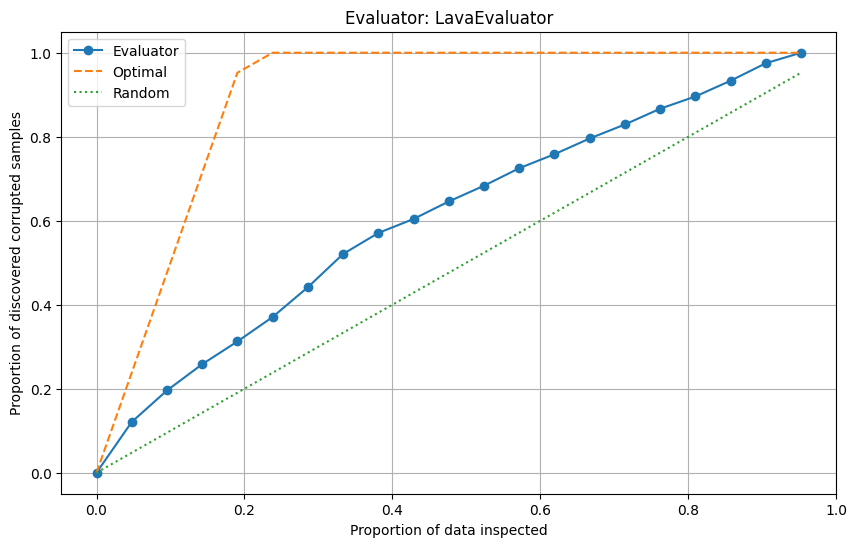

{'KNNEvaluator': {'found_rates': [0.0,
   0.17916666666666667,
   0.22916666666666666,
   0.24583333333333332,
   0.2625,
   0.3,
   0.43333333333333335,
   0.4875,
   0.5291666666666667,
   0.5666666666666667,
   0.6166666666666667,
   0.6458333333333334,
   0.6708333333333333,
   0.7208333333333333,
   0.7666666666666667,
   0.8125,
   0.8583333333333333,
   0.8916666666666667,
   0.9125,
   0.95,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.12083333333333333,
   0.19583333333333333,
   0.25833333

In [88]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train, y_labels_noisy, X_val, y_val)  
experiment.evaluate(noisy_train_indices)

In [108]:
from machine_learning_model import LogisticRegression
from nosify import mix_label, add_gauss_noise
X_copy = X_train.copy()
param = add_gauss_noise(X_copy, X_val, noise_rate=0.2)
X_train_noisy = param['x_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", X_train_noisy.shape)
# train model logistic regression
input_dim = X_train_noisy.shape[1]
num_classes = len(np.unique(y_train))
# train model logistic regression
input_dim = X_train.shape[1]
model = lm.LinearRegression()
model.fit(X_train_noisy, y_train)
# predict
y_pred = model.predict(X_val)
# evaluate
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

Noisy training labels shape: (1200, 7)
Mean Squared Error: 0.3542067208797641


Running evaluator: KNNEvaluator


Computing Shapley Values: 100%|██████████| 1199/1199 [00:00<00:00, 7065.73it/s]


KNNEvaluator completed in 0.29 seconds.
Running evaluator: LavaEvaluator
C1 shape: torch.Size([1, 1200, 400])
C2 shape: torch.Size([1, 1200, 400])
C1: tensor([[[ 7.2259, 12.0239,  5.2460,  ..., 11.2108,  3.6809,  7.7096],
         [15.1748,  8.4390, 15.1667,  ...,  2.1558,  6.5927, 15.8992],
         [12.4614,  8.7108,  6.9188,  ...,  8.1584,  5.3628, 10.2108],
         ...,
         [14.3234,  8.7176,  4.8411,  ...,  9.2680,  9.7236, 13.9619],
         [12.1254,  3.7224,  1.8126,  ...,  6.9424,  6.3407, 15.5535],
         [ 9.9929,  3.0687,  6.9141,  ...,  4.2024,  5.3017, 11.8689]]])
C2: tensor([[[0.0697, 1.3497, 0.5011,  ..., 3.3560, 0.8541, 0.0383],
         [3.3955, 1.9761, 2.8247,  ..., 0.0302, 2.4717, 3.3640],
         [0.4144, 1.0050, 0.1563,  ..., 3.0112, 0.5093, 0.3830],
         ...,
         [0.3137, 1.1057, 0.2571,  ..., 3.1120, 0.6101, 0.2823],
         [2.1085, 0.6891, 1.5377,  ..., 1.3172, 1.1847, 2.0770],
         [2.7771, 1.3577, 2.2064,  ..., 0.6485, 1.8534, 2.7457]]

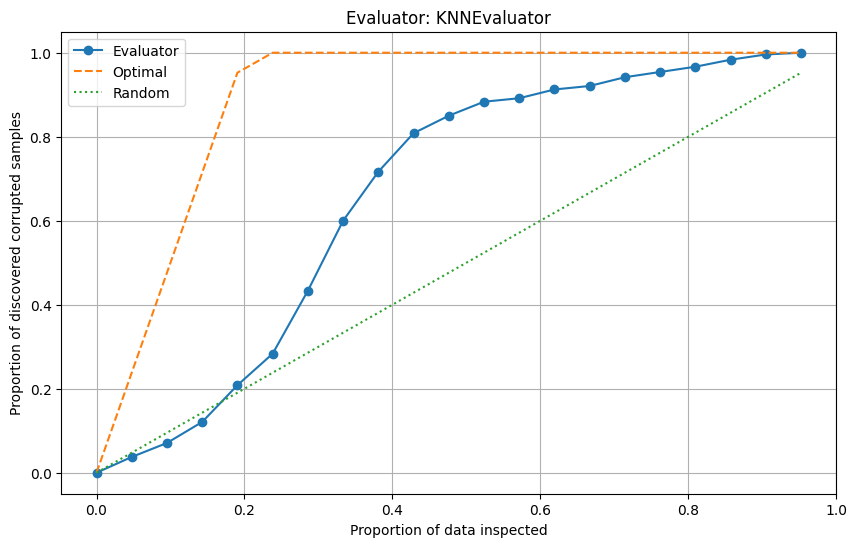

LavaEvaluator: {'found_rates': [0.0, 0.20833333333333334, 0.3458333333333333, 0.44583333333333336, 0.5291666666666667, 0.6041666666666666, 0.6666666666666666, 0.7208333333333333, 0.7666666666666667, 0.8208333333333333, 0.85, 0.8583333333333333, 0.875, 0.8875, 0.9, 0.9083333333333333, 0.925, 0.9416666666666667, 0.9541666666666667, 0.975, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


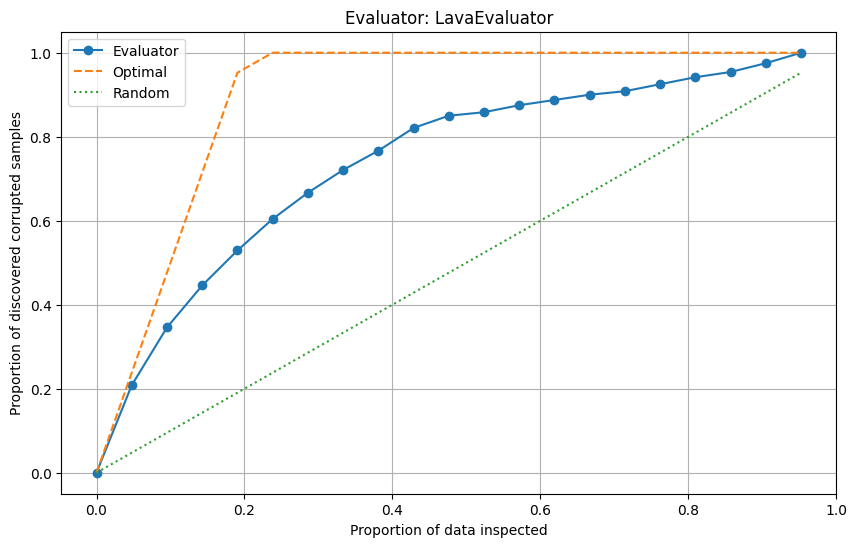

{'KNNEvaluator': {'found_rates': [0.0,
   0.0375,
   0.07083333333333333,
   0.12083333333333333,
   0.20833333333333334,
   0.2833333333333333,
   0.43333333333333335,
   0.6,
   0.7166666666666667,
   0.8083333333333333,
   0.85,
   0.8833333333333333,
   0.8916666666666667,
   0.9125,
   0.9208333333333333,
   0.9416666666666667,
   0.9541666666666667,
   0.9666666666666667,
   0.9833333333333333,
   0.9958333333333333,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.20833333333333334,
   0.34583333

In [109]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train_noisy, y_train, X_val, y_val)  
experiment.evaluate(noisy_train_indices)

In [89]:
from regression_dataset import download_wave_energy, split_data_train_val_test
X, y = download_wave_energy()
X, y = X[:2000], y[:2000]
X_train, y_train, X_val, y_val, X_test, y_test = split_data_train_val_test(X, y, 0.6, 0.2)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)
X_test = scale.transform(X_test)
print("Data converted to PyTorch tensors successfully.")

Train: (1200, 48) Validation: (400, 48) Test: (400, 48)
Data converted to PyTorch tensors successfully.


In [90]:
# save
import pickle

with open('x_y_embedding_wave_energy.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_val, y_val, X_test, y_test), f)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(1200, 48) (400, 48) (400, 48)
(1200,) (400,) (400,)


In [110]:
### Load x_y_embedding_data
import pickle
with open('x_y_embedding_wave_energy.pkl', 'rb') as f:
    X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(f)

In [92]:
from machine_learning_model import LogisticRegression
from nosify import mix_label
y_copy = y_train.copy()
param = mix_label(y_copy, y_val, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)
# train model logistic regression
input_dim = X_train.shape[1]
model = lm.LinearRegression()
model.fit(X_train, y_labels_noisy)
# predict
y_pred = model.predict(X_val)
# evaluate
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

400
Noisy training labels shape: (1200,)
Mean Squared Error: 0.16190321672619162


Running evaluator: KNNEvaluator


Computing Shapley Values: 100%|██████████| 1199/1199 [00:00<00:00, 5731.79it/s]


KNNEvaluator completed in 0.55 seconds.
Running evaluator: LavaEvaluator
C1 shape: torch.Size([1, 1200, 400])
C2 shape: torch.Size([1, 1200, 400])
C1: tensor([[[66.4108, 57.4997, 48.3006,  ..., 59.7896, 47.6078, 46.4577],
         [37.4765, 19.3775, 45.9160,  ..., 54.3172, 43.9840, 31.3562],
         [48.2624, 50.0853, 47.6385,  ..., 56.4458, 41.4513, 47.1404],
         ...,
         [47.4420, 42.4732, 42.1977,  ..., 38.2176, 44.6581, 42.8952],
         [47.7686, 29.8325, 49.0770,  ..., 59.5865, 40.9536, 51.7065],
         [34.8452, 32.9072, 59.7892,  ..., 57.4767, 43.9386, 34.2332]]])
C2: tensor([[[0.1952, 0.8290, 0.4135,  ..., 0.6390, 0.3869, 0.5011],
         [1.0991, 0.0749, 0.4905,  ..., 0.2650, 0.5171, 1.4051],
         [0.8295, 0.1947, 0.2209,  ..., 0.0046, 0.2475, 1.1355],
         ...,
         [0.5513, 0.4729, 0.0573,  ..., 0.2829, 0.0308, 0.8572],
         [0.4025, 0.6217, 0.2061,  ..., 0.4316, 0.1795, 0.7085],
         [0.5763, 0.4479, 0.0323,  ..., 0.2579, 0.0058, 0.8822]]

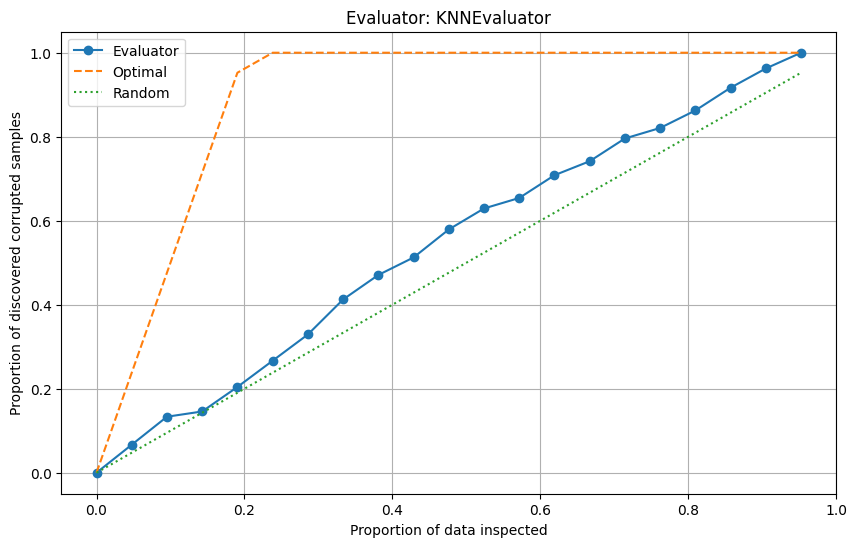

LavaEvaluator: {'found_rates': [0.0, 0.0375, 0.1, 0.16666666666666666, 0.2125, 0.25833333333333336, 0.32916666666666666, 0.375, 0.43333333333333335, 0.5, 0.5458333333333333, 0.5958333333333333, 0.6375, 0.6833333333333333, 0.725, 0.7875, 0.8291666666666667, 0.8666666666666667, 0.9041666666666667, 0.9416666666666667, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


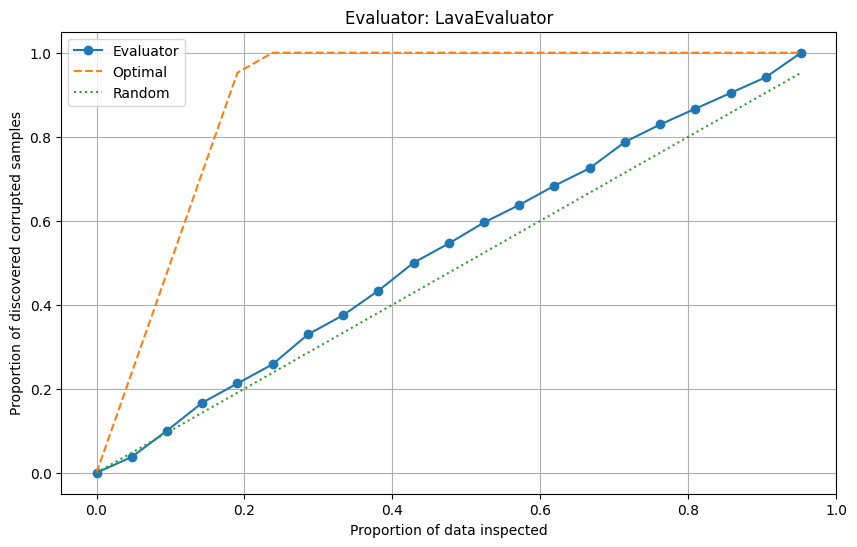

{'KNNEvaluator': {'found_rates': [0.0,
   0.06666666666666667,
   0.13333333333333333,
   0.14583333333333334,
   0.20416666666666666,
   0.26666666666666666,
   0.32916666666666666,
   0.4125,
   0.4708333333333333,
   0.5125,
   0.5791666666666667,
   0.6291666666666667,
   0.6541666666666667,
   0.7083333333333334,
   0.7416666666666667,
   0.7958333333333333,
   0.8208333333333333,
   0.8625,
   0.9166666666666666,
   0.9625,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.0375,
   0.1,
   0.166666

In [93]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train, y_labels_noisy, X_val, y_val)  
experiment.evaluate(noisy_train_indices)

In [96]:
from machine_learning_model import LogisticRegression
from nosify import mix_label, add_gauss_noise
X_copy = X_train.copy()
param = add_gauss_noise(X_copy, X_val, noise_rate=0.2)
X_train_noisy = param['x_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", X_train_noisy.shape)
# train model logistic regression
input_dim = X_train_noisy.shape[1]
num_classes = len(np.unique(y_train))
# train model logistic regression
input_dim = X_train.shape[1]
model = lm.LinearRegression()
model.fit(X_train_noisy, y_train)
# predict
y_pred = model.predict(X_val)
# evaluate
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

Noisy training labels shape: (1200, 48)
Mean Squared Error: 0.5248925780927484


Running evaluator: KNNEvaluator


Computing Shapley Values: 100%|██████████| 1199/1199 [00:00<00:00, 6137.35it/s]


KNNEvaluator completed in 0.37 seconds.
Running evaluator: LavaEvaluator
C1 shape: torch.Size([1, 1200, 400])
C2 shape: torch.Size([1, 1200, 400])
C1: tensor([[[66.4108, 57.4997, 48.3006,  ..., 59.7896, 47.6078, 46.4577],
         [54.5623, 40.7917, 74.4409,  ..., 68.3015, 63.5821, 51.1985],
         [48.2624, 50.0853, 47.6385,  ..., 56.4458, 41.4513, 47.1404],
         ...,
         [47.4420, 42.4732, 42.1977,  ..., 38.2176, 44.6581, 42.8952],
         [47.7686, 29.8325, 49.0770,  ..., 59.5865, 40.9536, 51.7065],
         [61.5909, 60.5211, 75.9349,  ..., 76.5499, 67.9212, 61.9892]]])
C2: tensor([[[0.1952, 0.8290, 0.4135,  ..., 0.6390, 0.3869, 0.5011],
         [0.0189, 1.0431, 0.6275,  ..., 0.8530, 0.6010, 0.2870],
         [0.8295, 0.1947, 0.2209,  ..., 0.0046, 0.2475, 1.1355],
         ...,
         [0.5513, 0.4729, 0.0573,  ..., 0.2829, 0.0308, 0.8572],
         [0.4025, 0.6217, 0.2061,  ..., 0.4316, 0.1795, 0.7085],
         [1.5518, 0.5276, 0.9432,  ..., 0.7177, 0.9698, 1.8578]]

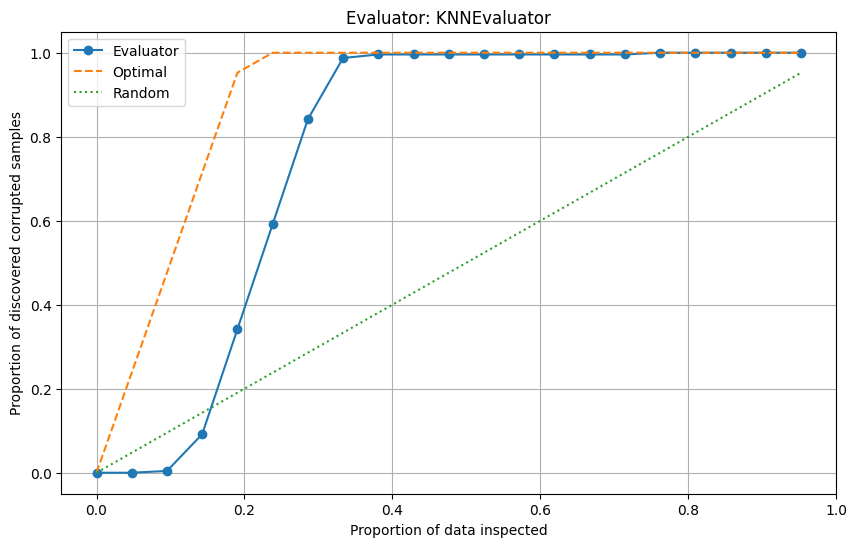

LavaEvaluator: {'found_rates': [0.0, 0.2, 0.375, 0.5625, 0.7291666666666666, 0.8416666666666667, 0.9333333333333333, 0.9458333333333333, 0.9708333333333333, 0.9791666666666666, 0.9916666666666667, 0.9916666666666667, 0.9916666666666667, 0.9958333333333333, 0.9958333333333333, 0.9958333333333333, 0.9958333333333333, 0.9958333333333333, 0.9958333333333333, 0.9958333333333333, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


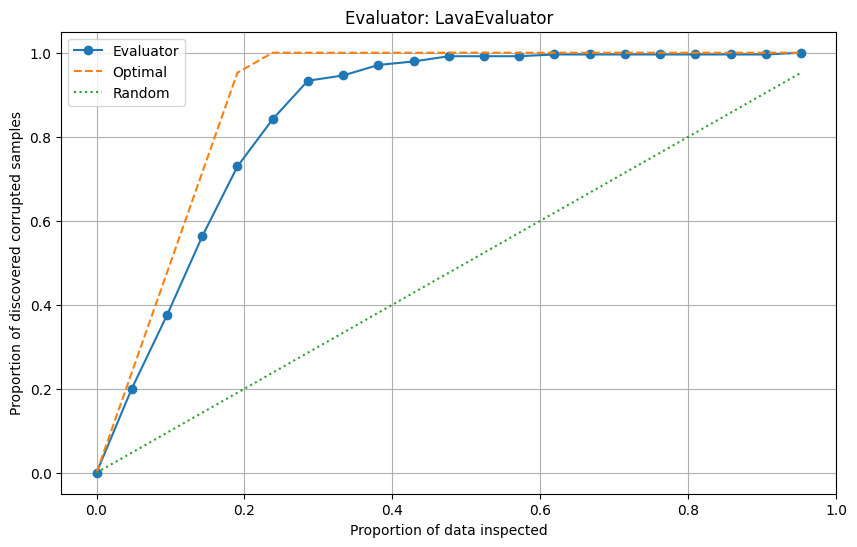

{'KNNEvaluator': {'found_rates': [0.0,
   0.0,
   0.004166666666666667,
   0.09166666666666666,
   0.3416666666666667,
   0.5916666666666667,
   0.8416666666666667,
   0.9875,
   0.9958333333333333,
   0.9958333333333333,
   0.9958333333333333,
   0.9958333333333333,
   0.9958333333333333,
   0.9958333333333333,
   0.9958333333333333,
   0.9958333333333333,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.2,
   0.375,
   0.5625,
   0.7291666666666666,
   0.841666666666666

In [97]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train_noisy, y_train, X_val, y_val)  
experiment.evaluate(noisy_train_indices)